In [1]:
import numpy as np
import matplotlib.pyplot as plt
from modAM import mod_AM_convencional, demod_AM_convecional

## Definir parâmetros da simulação

In [2]:
N_samples = 1000                 # Número de amostras
fs = 2e3                         # Frequência de amostragem
T_simul  = N_samples/fs          # Tempo de simulação
t = np.linspace(0,N_samples-1,N_samples)/fs  # Instantes de tempo

In [3]:
# Definir sinal mensagem
fm  = 5
A_m = 2
m_t = np.cos(2*np.pi*fm*t)

## Transmissor AM

In [6]:
fc = 125
A_c = 1
a = 0.6
u_t = mod_AM_convencional(m_t,t,A_c,fc,a)

Text(0, 0.5, 'Sinal DSBSC-AM')

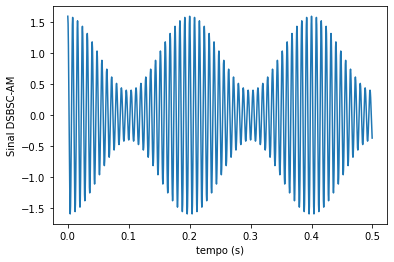

In [7]:
plt.plot(t, u_t)
plt.xlabel('tempo (s)')
plt.ylabel('Sinal DSBSC-AM')

## Resposta em Frequência

In [8]:
U_f = np.fft.fftshift(np.fft.fft(u_t))
f = np.linspace(-fs/2,fs/2,N_samples)

Text(0, 0.5, 'Sinal DSB')

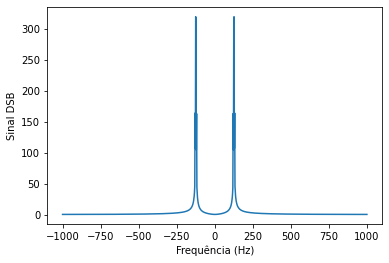

In [9]:
plt.plot(f,np.abs(U_f))
plt.xlabel('Frequência (Hz)')
plt.ylabel('Sinal DSB')



## Demodulação

In [10]:
# Demodulação
cutoff = fm + 20
g_t, r_t = demod_AM_convecional(u_t,cutoff,fs)

Text(0, 0.5, 'Sinal multiplicado')

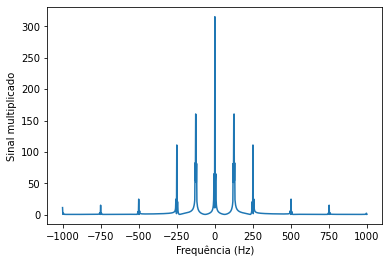

In [11]:
R_f = np.fft.fftshift(np.fft.fft(r_t))
plt.plot(f,np.abs(R_f))
plt.xlabel('Frequência (Hz)')
plt.ylabel('Sinal multiplicado')

Text(0, 0.5, 'Sinal multiplicado')

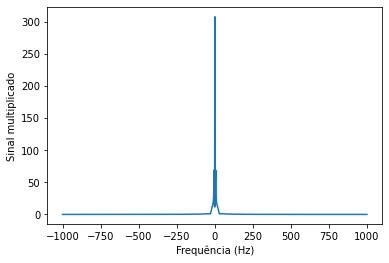

In [12]:
G_f = np.fft.fftshift(np.fft.fft(g_t))
plt.plot(f,np.abs(G_f))
plt.xlabel('Frequência (Hz)')
plt.ylabel('Sinal multiplicado')

Text(0, 0.5, 'Mensagem estimada')

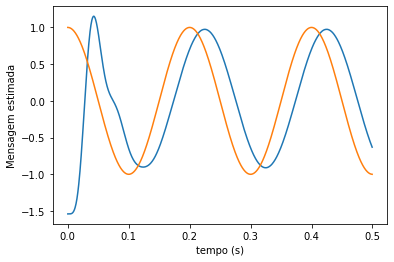

In [17]:
amp = 5
plt.plot(t,amp*(g_t - np.mean(g_t)))
plt.plot(t,m_t)
plt.xlabel('tempo (s)')
plt.ylabel('Mensagem estimada')